In [ ]:
#多维数组的索引和切片(作业名称)

---
个人信息:  
- 姓名: 王续龙
- 年级: 2020
- 专业: 智能科学与技术
- 班级: 1班
---

- 诚信守则:  
    - 我承诺该报告内容**为我个人书写非直接抄袭所得。**
    - 我**可以解释答题思路并复现我的答案。**
    - 如无法实现以上要求，**我愿意承担由此带来的后果。**

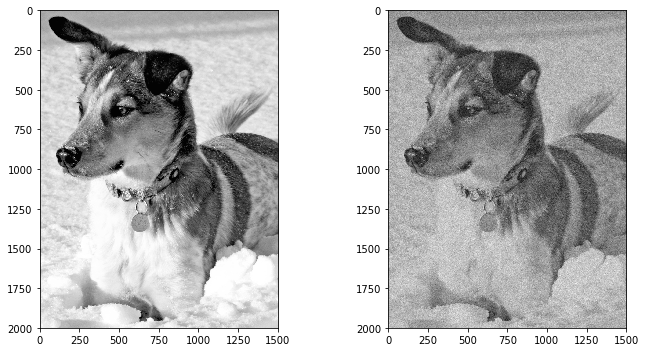

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
np.random.seed(2021)  

img  =  cv.imread("dog.jpg",0)
  #  用opencv读入  dog.jpg  灰度图

h,w  =  img.shape
  #  获得图像的高h和宽w

#  声称噪音图
#  1.  噪音图与狗图的结构相同
#  2.  每一个噪音值应该为满足标准正态分布的随机值20倍
noise  =  np.random.randn(h,w)*20


#  把原图加上噪音构建包含噪音图
img_noise  = noise+img
#  在1个画板上绘制2附子图,  画板高5，宽10
#  第1个子图显示原始灰度图
#  第2个子图显示噪音灰度图
#  2个子图都已灰白色调显示
fg,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(img_noise,cmap='gray')


#  调整子图位置
#  并以最紧凑模式保存plt.show()对应显示内容到  out.png
plt.tight_layout()

plt.savefig('out.png',bbox_inches='tight')


In [4]:
from skimage import io
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
img  =  io.imread('dog.jpg')


#  把图像变成2维结构
#  该结构只有3列，分别对应R,  G,  B三个通道
img  =  img.reshape(-1,3)
rgb_max  =  np.max(img,axis=0)
  #  沿着0轴计算RGB最大值列表
rgb_min  =  np.min(img,axis=0)
  #  沿着0轴计算RGB最小值列表
rgb_mean  =  np.mean(img,axis=0)
  #  沿着0轴计算RGB平均值列表
rgb_std  =  np.std(img,axis=0)
      #  沿着0轴计算RGB标准正差列表
rgb_25p  =  np.percentile(img,25,axis=0)
  #  沿着0轴计算RGB值排序后  25%  值列表
rgb_50p  =  np.percentile(img,50,axis=0)
  #  沿着0轴计算RGB值排序后  50%  值(中位数)列表
rgb_75p  =  np.percentile(img,75,axis=0)
  #  沿着0轴计算RGB值排序后  75%  值列表

result  =  [
        ['meta','R','G','B'],
        ['max']+rgb_max.tolist(),
        ['min']+rgb_min.tolist(),
        ['mean']+rgb_mean.tolist(),
        ['std']+rgb_std.tolist(),
        ['25%']+rgb_25p.tolist(),
        ['50%']+rgb_50p.tolist(),
        ['75%']+rgb_75p.tolist()
]

print(tabulate(result,tablefmt='grid'))  #  打印结果


+------+--------------------+--------------------+--------------------+
| meta | R                  | G                  | B                  |
+------+--------------------+--------------------+--------------------+
| max  | 255                | 255                | 255                |
+------+--------------------+--------------------+--------------------+
| min  | 0                  | 0                  | 0                  |
+------+--------------------+--------------------+--------------------+
| mean | 181.42300533333332 | 169.47594566666666 | 151.87742033333333 |
+------+--------------------+--------------------+--------------------+
| std  | 61.4472374629048   | 69.72452856810297  | 83.22114303811752  |
+------+--------------------+--------------------+--------------------+
| 25%  | 144.0              | 121.0              | 79.0               |
+------+--------------------+--------------------+--------------------+
| 50%  | 198.0              | 192.0              | 189.0        

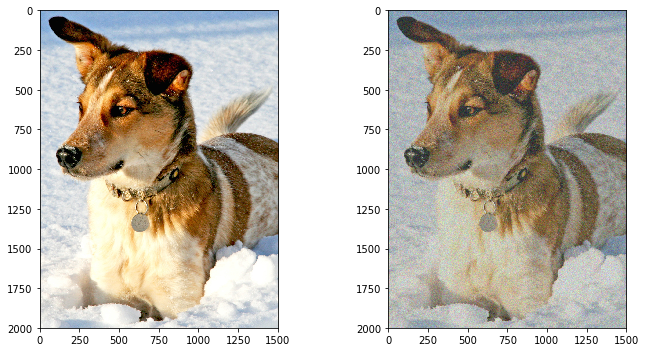

In [6]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2021)  

#  读入RGB图:  dog.jpg
img  =  io.imread("dog.jpg")
h,w,c  =  img.shape
  #  获得图像的高h,宽w,通道数c

#  生成噪音图
#  1.  噪音图与狗图的结构相同
#  2.  每一个噪音值应该为满足标准正态分布的随机值20倍
noise  =  np.random.randn(h,w,c)*20

#  把原图加上噪音构建包含噪音图
img_noise  =  noise+img
#  加上后如果不处理,  RGB三个通道的范围就超越0~255整型(或0~1浮点数)了
#  所以我们要把三个通道都极小极大值归一化
#  把图像改成二维结构，只有三列，每列对应一个RGB通道
img_temp  =  img_noise.reshape(-1,3)

rgb_min  =  np.min(img_temp,axis=0)
  #  沿列得到RGB的最小值
rgb_max  =  np.max(img_temp,axis=0)
  #  沿列得到RGB的最大值
img_noise  =  ((img_noise-rgb_min)/(rgb_max-rgb_min)).reshape(h,w,c)  
#  沿着3列做极小极大值归一，然后reshape回原图结构

#  在1个画板上绘制2附子图,  画板高5，宽10
#  第1个子图显示原始灰度图
#  第2个子图显示噪音灰度图
#  2个子图都已灰白色调显示
#  调整子图位置
#  并以最紧凑模式保存plt.show()对应显示内容到  out.png
fg,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(img_noise,cmap='gray')
plt.tight_layout()
plt.savefig('out.png',bbox_inches='tight')



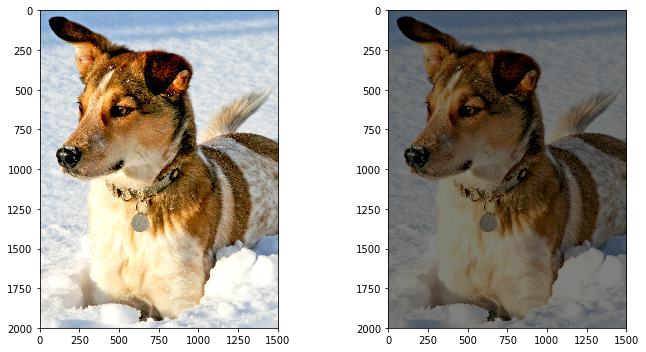

In [7]:
from skimage import io,img_as_float
import matplotlib.pyplot as plt
img  =  img_as_float(io.imread("dog.jpg"))

#  把图像亮度调整到原有亮度的50%
img_dark  =  img*0.5

#  在1个画板上绘制2附子图,  画板高5，宽10
#  第1个子图显示原始灰度图
#  第2个子图显示噪音灰度图
#  2个子图都已灰白色调显示
#  调整子图位置
#  并以最紧凑模式保存plt.show()对应显示内容到  out.png
fg,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(img_dark,cmap='gray')
plt.tight_layout()
plt.savefig('out.png',bbox_inches='tight')



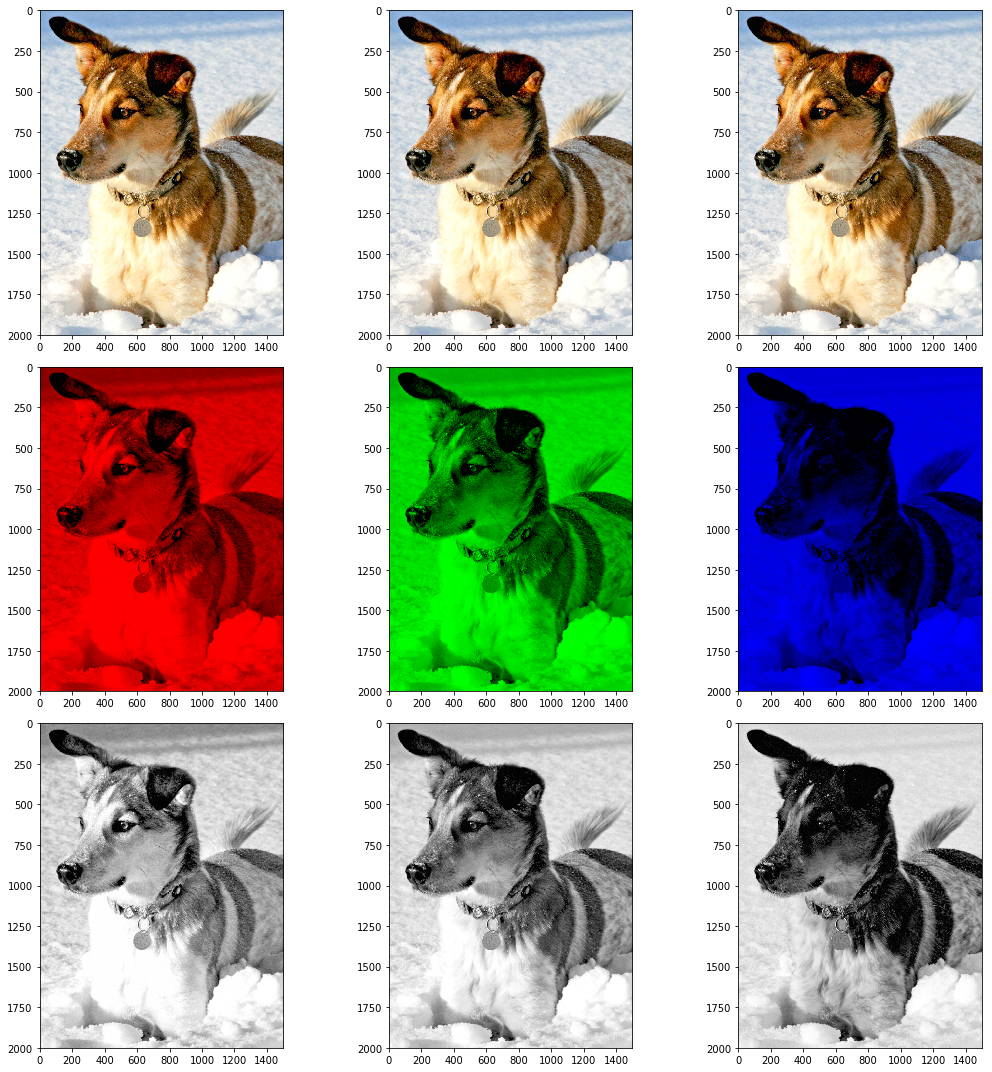

In [9]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
img  =  io.imread('dog.jpg')
rr  =  img*[1,0,0]
  #  得到红色通道红色图
gg  =  img*[0,1,0]
  #  得到绿色通道绿色图
bb  =  img*[0,0,1]
  #  得到蓝色通道蓝色图
img2  =  rr+gg+bb
  #  把rr,gg,bb合成RGB图
r  =  img@[1,0,0]
  #  得到红色通道单通道图
g  =  img@[0,1,0]
  #  得到绿色通道单通道图
b  =  img@[0,0,1]
  #  得到蓝色通道单通道图

img3  =  np.stack((r,g,b),axis=2)
  #  把r,g,b合成RGB图
#  在1个画板上绘制3*3附子图,  画板高15，宽15
fg,ax=plt.subplots(3,3,figsize=(15,15))

ax[0,0].imshow(img)
ax[0,1].imshow(img2)
ax[0,2].imshow(img3)
ax[1,0].imshow(rr,cmap='gray')
ax[1,1].imshow(gg,cmap='gray')
ax[1,2].imshow(bb,cmap='gray')
ax[2,0].imshow(r,cmap='gray')
ax[2,1].imshow(g,cmap='gray')
ax[2,2].imshow(b,cmap='gray')

plt.tight_layout()  #  调整子图位置
#  plt.show()

#  以最紧凑模式保存显示内容到  out.png
plt.savefig('out.png',  bbox_inches='tight')  



In [ ]:
import matplotlib.pyplot as plt
import numpy as np